In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from collections import Counter


nlp = spacy.load("en_core_web_sm")

def get_pos_proportion(data_path, human_label=0, chatgpt_label=1, top_n=10):
    data = pd.read_csv(data_path)
    human_texts = data[data.labels == human_label].text.values
    chatgpt_texts = data[data.labels == chatgpt_label].text.values

    pos_list = []

    for text in human_texts:
        doc = nlp(text)
        for token in doc:
            if not token.is_punct and token.pos_ != 'SPACE':
                pos_list.append(token.pos_)

    pos_counts = Counter(pos_list)
    top_pos = [pos_freq for pos_freq in pos_counts.most_common(top_n) if pos_freq[0] != 'SPACE']
    top_pos_pro = [[pos, freq / len(pos_list) * 100] for pos, freq in top_pos]

    chatgpt_pos_list = []
    for text in chatgpt_texts:
        doc = nlp(text)
        for token in doc:
            if not token.is_punct and token.pos_ != 'SPACE':
                chatgpt_pos_list.append(token.pos_)

    chatgpt_pos_counts = Counter(chatgpt_pos_list)
    chatgpt_pos_counts = {pos: freq / len(chatgpt_pos_list) * 100 for pos, freq in chatgpt_pos_counts.items()}

    pos_labels = []
    human_distribution = []
    chatgpt_distribution = []
    for pos, pro in top_pos_pro:
        pos_labels.append(spacy.explain(pos))
        human_distribution.append(pro)
        chatgpt_distribution.append(chatgpt_pos_counts.get(pos, 0))

    human_distribution = [round(d, 1) for d in human_distribution]
    chatgpt_distribution = [round(d, 1) for d in chatgpt_distribution]

    return pos_labels, human_distribution, chatgpt_distribution

def get_dep_relations(data_path, human_label=0, chatgpt_label=1, top_n=10):
    data = pd.read_csv(data_path)
    human_texts = data[data.labels == human_label].text.values
    chatgpt_texts = data[data.labels == chatgpt_label].text.values

    human_dep_relations = []
    for text in human_texts:
        doc = nlp(text)
        for token in doc:
            if token.dep_ != 'punct':
                human_dep_relations.append(token.dep_)

    chatgpt_dep_relations = []
    for text in chatgpt_texts:
        doc = nlp(text)
        for token in doc:
            if token.dep_ != 'punct':
                chatgpt_dep_relations.append(token.dep_)

    human_dep_counts = Counter(human_dep_relations).most_common(top_n)
    chatgpt_dep_counts = Counter(chatgpt_dep_relations)

    dep_labels = [spacy.explain(dep) for dep, _ in human_dep_counts]
    human_distribution = [count / sum(count for _, count in human_dep_counts) * 100 for _, count in human_dep_counts]
    chatgpt_distribution = [chatgpt_dep_counts.get(dep, 0) / sum(chatgpt_dep_counts.values()) * 100 for dep, _ in human_dep_counts]

    human_distribution = [round(d, 1) for d in human_distribution]
    chatgpt_distribution = [round(d, 1) for d in chatgpt_distribution]

    return dep_labels, human_distribution, chatgpt_distribution

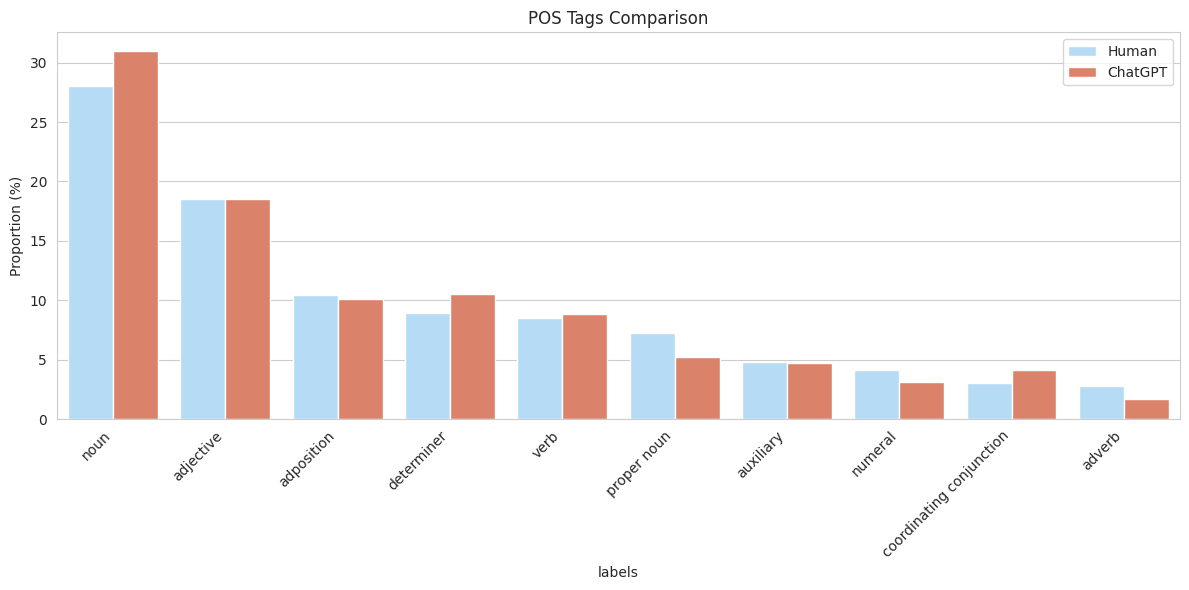

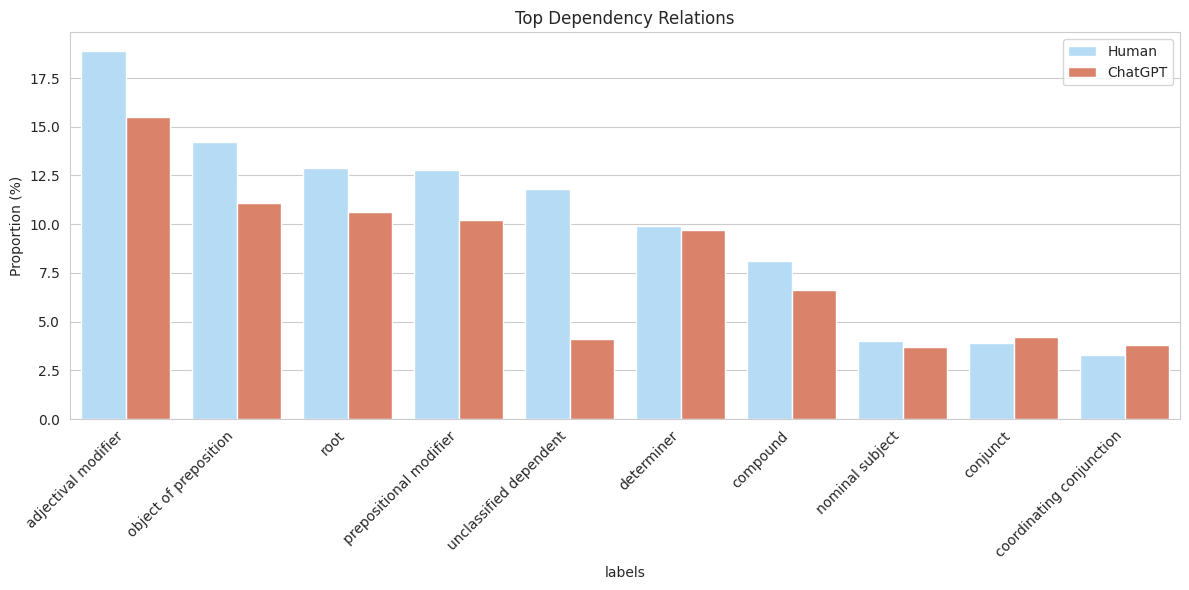

In [3]:
def plot_pos(labels, x_bar, y_bar, ylabel, title):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    data = {'labels': labels, 'Human': x_bar, 'ChatGPT': y_bar}
    df = pd.DataFrame(data)
    ax = sns.barplot(x='labels', y='value', hue='variable', data=pd.melt(df, ['labels']), palette=["#aadfff", "#ed7857"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pos_proportion.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_dep(labels, x_bar, y_bar, ylabel, title):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    data = {'labels': labels, 'Human': x_bar, 'ChatGPT': y_bar}
    df = pd.DataFrame(data)
    ax = sns.barplot(x='labels', y='value', hue='variable', data=pd.melt(df, ['labels']), palette=["#aadfff", "#ed7857"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig('dep_relations.png', dpi=300, bbox_inches='tight')
    plt.show()

data_path = 'all_data.csv'
top_n = 10
pos_labels, human_pos_distribution, chatgpt_pos_distribution = get_pos_proportion(data_path, top_n=top_n)
plot_pos(pos_labels, human_pos_distribution, chatgpt_pos_distribution, ylabel='Proportion (%)', title='POS Tags Comparison')

top_n = 10
dep_labels, human_dep_distribution, chatgpt_dep_distribution = get_dep_relations(data_path, top_n=top_n)
plot_dep(dep_labels, human_dep_distribution, chatgpt_dep_distribution, ylabel='Proportion (%)', title='Top Dependency Relations')